<a href="https://colab.research.google.com/github/Ryan-py/tinymlprojects-/blob/main/Iris_dataset_with_tinyMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow  Classification model with Iris dataset
![iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


## Dataset

A small classic dataset from Fisher, 1936. One of the earliest datasets used for evaluation of classification methodologies.

This is the "Iris" dataset. Originally published at UCI Machine Learning Repository: Iris Data Set, this small dataset from 1936 is often used for testing out machine learning algorithms and visualizations (for example, Scatter Plot). Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

## 1. Import dependent libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [2]:
# Data file path
FILE_PATH = '/content/Iris.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [3]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 2. Preparing dataset

In [4]:
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
y = iris_data.loc[:, ['Species']]

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_label= encoder.fit_transform(y)
y_label

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Dataset will be prepared by the tensorflow `from_tensor_slice()` method.

In [6]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [7]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105,)
(4,)


In [8]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
116,6.5,3.0,5.5,1.8
65,6.7,3.1,4.4,1.4
67,5.8,2.7,4.1,1.0
45,4.8,3.0,1.4,0.3


In [9]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(50, activation='relu',),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [10]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 7,173
Trainable params: 7,173
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, batch_size=50,epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 225ms/step - loss: 1.1450 - accuracy: 0.3905 - val_loss: 0.9154 - val_accuracy: 0.7111
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.9463 - accuracy: 0.5619 - val_loss: 0.8418 - val_accuracy: 0.7111
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.8553 - accuracy: 0.5810 - val_loss: 0.7946 - val_accuracy: 0.7778
Epoch 4/100
3/3 [==============================] - 0s 40ms/step - loss: 0.8152 - accuracy: 0.6571 - val_loss: 0.7529 - val_accuracy: 0.9111
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 0.7656 - accuracy: 0.6952 - val_loss: 0.6981 - val_accuracy: 0.8222
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 0.7246 - accuracy: 0.7048 - val_loss: 0.6627 - val_accuracy: 0.7778
Epoch 7/100
3/3 [==============================] - 0s 50ms/step - loss: 0.7030 - accuracy: 0.7333 - val_loss: 0.6217 - val_accuracy: 0.8444
Epoch 8/100
3/3 [==

In [13]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.1514 - accuracy: 0.9556


[0.15140071511268616, 0.9555555582046509]

In [20]:
input_value = np.array([[5.1, 3.5, 1.4, 0.2]])


In [15]:
predictions = model.predict(input_value)
predictions

1/1 [==============================] - 0s 223ms/step


array([[9.9906176e-01, 9.3828596e-04, 2.0391136e-10]], dtype=float32)

## Performance Monitor

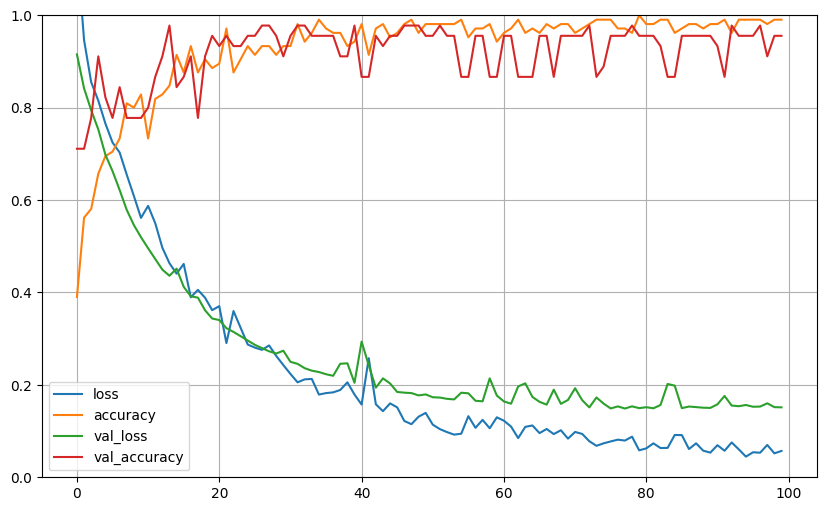

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model conversion🤖
For this we are using tensoflowlite(TFLite).TFLite  is a framework designed for deploying machine learning models on resource-constrained devices. Here are some key features of TFLite and their brief explanations:

1. Model optimization: TFLite provides tools to optimize models for deployment on edge devices, including techniques like quantization to reduce model size and improve performance.

2. Efficient inference: TFLite incorporates optimizations for fast inference on edge devices, leveraging hardware acceleration when available to accelerate computations and improve inference speed.

3. Small footprint: TFLite has a small memory and disk footprint, making it suitable for devices with limited resources, ensuring efficient execution even on low-power microcontrollers or devices with limited storage capacity.

4. Cross-platform compatibility: TFLite supports various platforms, such as Android, iOS, Linux, and microcontrollers, allowing seamless deployment of models across different devices and operating systems.

5. Custom operators and extensions: TFLite enables the integration of custom operators or extensions, enabling device-specific functionality or optimizing the execution of specific operations.

6. Integration with TensorFlow ecosystem: TFLite seamlessly integrates with TensorFlow, a popular deep learning framework, allowing models trained using TensorFlow to be converted and deployed using TFLite.



In [17]:
# Create a TFLiteConverter object and initialize it with your Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)



# Convert the Keras model to the TFLite format
tflite_model = converter.convert()

# Save the converted TFLite model to a file
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

#The xxd tool
`xxd` is a command-line tool used in TinyML to convert a TensorFlow Lite (TFLite) model to a C array and header file. It converts the binary TFLite model into a hexadecimal representation and generates a C header file containing the hexadecimal values. This allows the model to be easily embedded in C or C++ code for deployment on resource-constrained devices.
![xxdtool](https://itslinuxfoss.com/wp-content/uploads/2023/02/image-164.png)

In [18]:
from google.colab import files

In [19]:
!echo "const unsigned char model[] = {" > /content/iris_model.h
!cat /content/tflite_model.tflite | xxd -i >> /content/iris_model.h #create an hexadecimal array containing all our parameters
!echo "};" >> /content/iris_model.h

files.download("/content/iris_model.h") #automaticly download your file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>